<a href="https://colab.research.google.com/github/suajeong52/collapsible_tube/blob/main/sua_collapsibletube_try_(graph).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install sciann

     |████████████████████████████████| 174 kB 9.2 MB/s 
     |████████████████████████████████| 460.3 MB 7.7 kB/s 
     |████████████████████████████████| 561 kB 58.2 MB/s 
     |████████████████████████████████| 462 kB 61.6 MB/s 
     |████████████████████████████████| 132 kB 37.3 MB/s 
     |████████████████████████████████| 1.2 MB 49.4 MB/s 
     |████████████████████████████████| 14.8 MB 34.6 MB/s 
     |████████████████████████████████| 4.0 MB 37.4 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68722 sha256=698d9fec2761a74c22a0b81da34e6b268be459ffa35d4c82fa042945f7fef917
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: numpy
    Found existin

In [2]:
import numpy as np 
import sciann as sn 
import matplotlib.pyplot as plt  
from numpy import pi
from sciann.utils.math import diff, sign, sin, sqrt, pow

---------------------- SCIANN 0.6.6.1 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.5.3 
Python Version: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0] 



In [3]:
x = sn.Variable('x')
t = sn.Variable('t')
u = sn.Functional('u', [x,t], 8*[20], 'tanh')
A = sn.Functional('A', [x,t],  8*[20], 'relu')

In [4]:
L1 = diff(A, t) + u * diff(A, x) + A * diff(u, x)

In [5]:
rho = 1
beta = 200
L2 = diff(u, t) + u * diff(u, x) + beta / (2 * rho * sn.pow(A * A + 0.01, 0.25)) * diff(A, x, order=1)

In [6]:
TOL = 0.1
T = 10
omega = 2 * np.pi / T
C1 = (1 - sign(t - TOL)) * (u - 0)
C2 = (1 - sign(t - TOL)) * (A - 1)
C3 = (1 - sign(x - TOL)) * (u - sin(omega * t))
C4 = (1 - sign(x - TOL)) * (A - 1)


In [7]:
m = sn.SciModel([x,t], [L1,L2, C1, C2, C3, C4], loss_func="mse", optimizer="Adam")

In [8]:
x_data, t_data = np.meshgrid(
    np.linspace(0, 50, 100), 
    np.linspace(0, 60, 100)
)

In [9]:
h = m.train([x_data, t_data], 6*['zero'], learning_rate=0.005, epochs=7000, batch_size =120,  verbose=1, shuffle=True)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
84/84 [==============================] - 1s 11ms/step - batch: 41.5000 - size: 119.0476 - loss: 0.0197 - add_2_loss: 6.9739e-27 - add_5_loss: 2.7398e-27 - mul_7_loss: 7.4585e-07 - mul_8_loss: 0.0000e+00 - mul_10_loss: 0.0197 - mul_11_loss: 0.0000e+00 - lr: 7.8125e-05 - time: 1.0245
Epoch 4505/7000
84/84 [==============================] - 1s 10ms/step - batch: 41.5000 - size: 119.0476 - loss: 0.0197 - add_2_loss: 7.0077e-27 - add_5_loss: 2.7855e-27 - mul_7_loss: 2.6351e-07 - mul_8_loss: 0.0000e+00 - mul_10_loss: 0.0197 - mul_11_loss: 0.0000e+00 - lr: 7.8125e-05 - time: 0.8792
Epoch 4506/7000
84/84 [==============================] - 1s 10ms/step - batch: 41.5000 - size: 119.0476 - loss: 0.0197 - add_2_loss: 6.9347e-27 - add_5_loss: 2.7419e-27 - mul_7_loss: 1.3216e-06 - mul_8_loss: 0.0000e+00 - mul_10_loss: 0.0197 - mul_11_loss: 0.0000e+00 - lr: 7.8125e-05 - time: 0.8520
Epoch 4507/7000
84/84 [==============================] - 1s 11ms/step - batch: 41.5

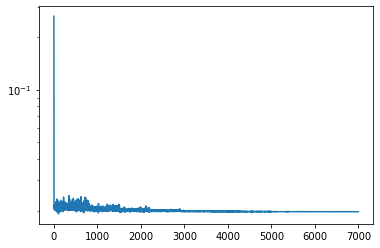

In [10]:
plt.semilogy(h.history['loss'])

In [11]:
h.history.keys()

dict_keys(['loss', 'add_2_loss', 'add_5_loss', 'mul_7_loss', 'mul_8_loss', 'mul_10_loss', 'mul_11_loss', 'lr', 'time'])

<function matplotlib.pyplot.show>

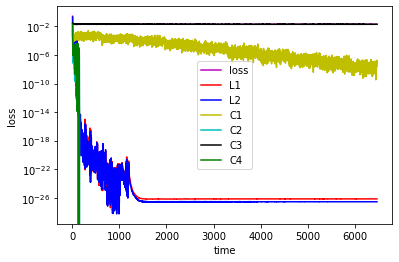

In [15]:
time = np.cumsum(h.history['time'])
plt.semilogy(time, h.history['loss'],'m')
plt.semilogy(time, h.history['add_2_loss'],'r')
plt.semilogy(time, h.history['add_5_loss'],'b')
plt.semilogy(time, h.history['mul_7_loss'],'y')
plt.semilogy(time, h.history['mul_8_loss'],'c')
plt.semilogy(time, h.history['mul_10_loss'],'k')
plt.semilogy(time, h.history['mul_11_loss'],'g')
plt.legend(['loss', 'L1','L2','C1','C2', 'C3','C4'])
plt.xlabel('time')
plt.ylabel('loss')
plt.show

Text(0, 0.5, 'u')

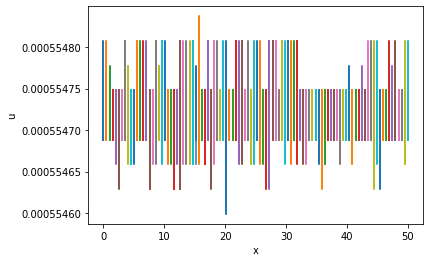

In [42]:
x_test, t_test = np.meshgrid(
    np.linspace(0, 50, 100), 
    np.linspace(0, 60, 100)
)
u_pred = u.eval(m, [x_test, t_test])
A_pred = A.eval(m, [x_test, t_test])

#fig = plt.figure(figsize=(3, 4))
plt.plot(x_test, u_pred)
plt.xlabel('x')
plt.ylabel('u')

Text(0, 0.5, 'A')

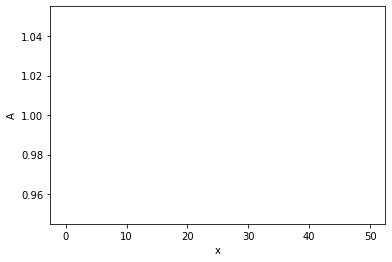

In [30]:
plt.plot(x_test, A_pred)
plt.xlabel('x')
plt.ylabel('A')

Text(0, 0.5, 'u')

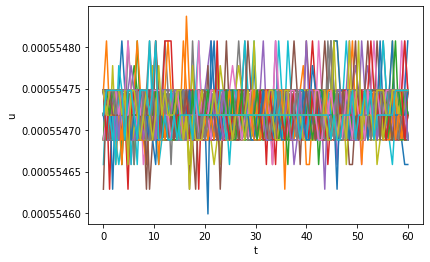

In [18]:
plt.plot(t_test, u_pred)
plt.xlabel('t')
plt.ylabel('u')

Text(0, 0.5, 'A')

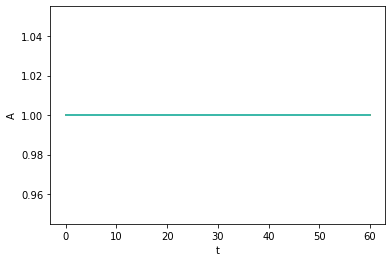

In [19]:
plt.plot(t_test, A_pred)
plt.xlabel('t')
plt.ylabel('A')